***
**Tutorial 7 for Chapter 2**

Case study 9: Telecom Plan Customization by K-means
***
<font color = 'darkred'>*Reference:*
<font color = 'darkred'>*数据挖掘原理与应用*

<!-- Acknowledgement:  
**i2DM (Tan, Steinbach, Kumar (2018) Introduction to Data Mining , 2nd Ed, Pearson )** Pearson Press   -->
For the course AMA546 Statistical Data Mining   
Lecturer: Dr. Catherine Liu    
AMA, PolyU, HKSAR

**Content:**
1. Objectives of the analysis
2. Description of the data
3. Exploratory data analysis
   - 3.1 Scatter plot matrix
   - 3.2 Correlation coefficient matrix
4. Model building
   - 4.1 Find the optimal K
   - 4.2 Build K-means model with k=3
   - 4.3 Model interpretation
       - 4.3.1 Number of samples in each category
       - 4.3.2 Scatter plot matrix colored by clustering results
       - 4.3.3 3D-plot
5. Conclusions
6. Discussion: Is it important to scale data before clustering?
   - 6.1 Benefit of scaling
   - 6.2 Cost of scaling

# Objectives of the analysis
This case study looks at **clustering customers using their call records in a month** to customize different telecom plans for them. In this study, we will perform clustering using the **K-means** method. The attributes are call duration in different time periods, recorded in **minutes**.

# Description of the data 
There are **3395 rows (samples)** and 7 columns in the dataset. The `CustomerID` column is the unique identifier of each customer, which is useless in the clustering. Thus the **total number of attributes is 6**. 

Note that:  
`Workday_working_call_duration`: Duration of call made during working hours on weekdays.  
`Workday_after_work_call_duration`: Duration of call made after working hours on weekdays.

In [1]:
import pandas as pd
import numpy as np

# Load the data
call_record = pd.read_csv('call_record.csv',engine='python')
print(call_record.shape)  # number of rows and columns
display(np.transpose(call_record.head()))  # display the table

(3395, 7)


0        1        2        3        4
CustomerID                        K100050  K100120  K100170  K100390  K100450
Workday_working_call_duration       40.61    68.12    100.2     55.8    58.63
Workday_after_work_call_duration    18.82    33.88     31.5     18.0     9.09
Weekend_call_duration                1.23     8.33      9.0     19.2    11.31
International_call_duration          4.47    13.42     4.86     5.62     5.06
Total_call_duration                 60.67   110.34    140.7     93.0    79.03
Average_call_duration                1.29     1.07     1.67     3.44     2.26

#  Exploratory data analysis
The original data set has been cleaned, so we'll **skip the data cleaning**. Firstly, we draw the **scatter plot matrx** of the dataset to observe the **correlation between features**, and explore whether observations can **achieve good clustering performance on certain dimension**.

## Scatter plot matrix
According to the scatter plot matrix, we found that the **samples were evenly distributed**, and **no two feature dimensions** could **separate the samples into several clusters**. `Workday_working_call_duration` and `Total_call_duration` have a strong linear relationship. We will further determine their correlation through the **correlation coefficient matrix**.

<Figure size 57600x97200 with 0 Axes>

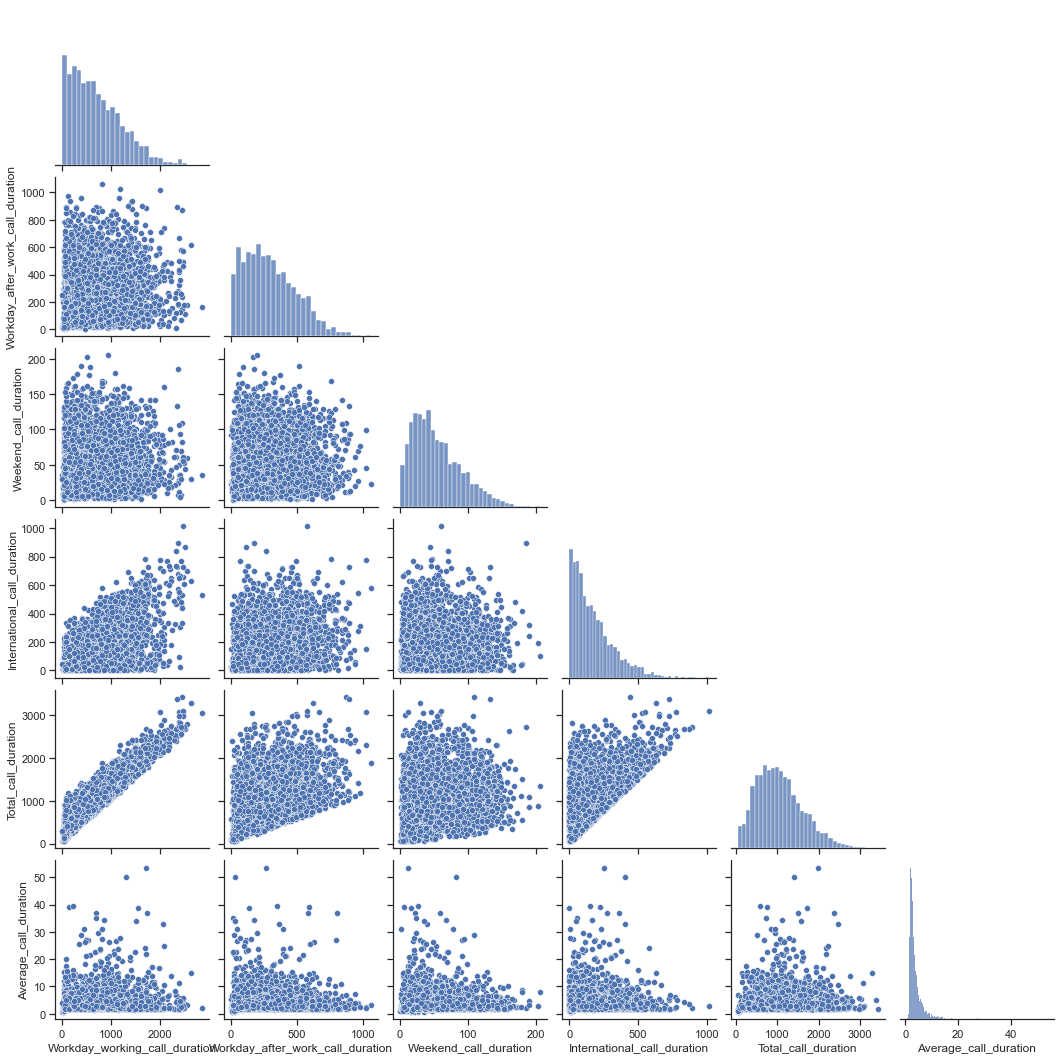

In [2]:
import seaborn as sns
import matplotlib. pyplot as plt

# Scatter plot matrices of explanatory variables
sns.set_theme(style="ticks")
plt.figure(figsize=(32, 54), dpi=1800)
sns.pairplot(call_record, corner=True)
plt.show()

## Correlation coefficient matrix
The following figure is the **heat map of the correlation coefficient matrix**. **Green** indicates **a large positive correlation**, while **red** indicates **a large negative correlation**. With a correlation coefficient of **0.3 as the boundary**, the correlation between most features was moderate. The correlation between `Total_call_duration` and `Workday_working_call_duration`, `Workday_after_work_call_duration`, `International_call_duration` is **0.935**, 0.39 and 0.606, respectively. Combined with the information from the Scatter plot matrix, this is because Total_call_duration represents the total call duration, which is equivalent to an upper bound of the other features. Therefore, **we will remove the feature `Total_call_duration` in the following analysis.**

In addition, the correlation between `Workday_working_call_duration` and `International_call_duration` is 0.566. This suggests that **a certain percentage of international calls are made during working hours on weekdays**.

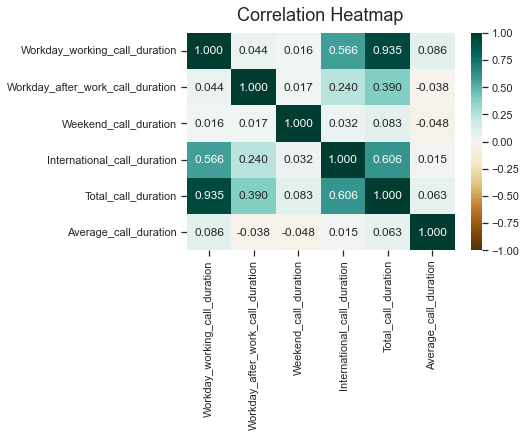

In [3]:
dCorr = call_record.corr()
heatmap = sns.heatmap(dCorr, annot=True, fmt=".3f", vmin=-1, vmax=1, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)
plt.show()

In [4]:
# Remove the Total_call_duration column
attributes = ['Workday_working_call_duration',
              'Workday_after_work_call_duration', 
              'Weekend_call_duration',
              'International_call_duration',
              'Average_call_duration']

# Model building 
## Find the optimal K
We use the **Elbow Method** to **determine the K value** of the k-means method. We have previously found that the **original data set is evenly distributed** in the low-dimensional space, and there is **no obvious clustering pattern**. That is to say, there is a high probability that there is **no underlying $k$ cluster structure in the original data set**, which makes **WCSS drop significantly when $K=k$**. As you can imagine, there is **no obvious elbow point** in the elbow plot.

Below, we calculate the WCSS of the corresponding K-means model from $K=1$ to $K=10$, and draw the Elbow plot:

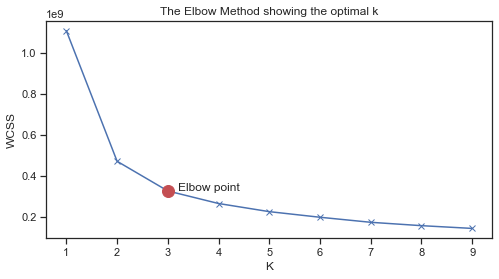

In [5]:
from sklearn.cluster import KMeans

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(call_record[attributes])
    distortions.append(kmeanModel.inertia_)
    
plt.figure(figsize=(8,4))
plt.plot(K, distortions, 'bx-')
plt.plot(3,distortions[2],'ro',label="point", markersize=12, linewidth=.5)
plt.text(3+.2,distortions[2]+.4,'Elbow point')
plt.xlabel('K')
plt.ylabel('WCSS')
plt.title('The Elbow Method showing the optimal k')
plt.show()

According to the Elbow plot, **either $k=2$ or $k=3$ is a suitable elbow point**. After $k=3$, WCSS declines gently. Considering the **diversity of telecom plans**, we **select the number of cluster groups $k=3$** in the following analysis.

## Bulid K-means model with k=3

In [6]:
# bulid K-means model with k=3
kmModel = KMeans(n_clusters=3)
kmModel = kmModel.fit(call_record[attributes])
call_record['cluster'] = kmModel.predict(call_record[attributes])

## Model interpretation
### Number of samples in each category
Let's first look at the **number of samples  each category** after clustering. In general, we want a similar 
sample size for each category. (If our model has a **sample size that is significantly smaller** in some categories than in others, it is likely that the **model is overfitting** to group some outliers into one category. This affects the generalization ability of the model.

When **K=3, the sample numbers of each group are similar**, indicating that this is a good classification.

In [7]:
item_series = pd.Series(call_record['cluster'])  # Convert the list to a Pandas Series
item_counts = item_series.value_counts()  # Count the frequency of each item
table = item_counts.to_frame().reset_index().rename(columns={'index': 'Item', 0: 'Count'})
display(table.sort_values(by=['Item']))  # Output the table, sort by Item

Item  cluster
2     0      534
0     1     1614
1     2     1247

### Scatter plot matrix colored by clustering results,

Then, we plotted the scatter plot matrix colored by the clustering results, aiming to study **which attribute K-means selected for clustering**. According to **density plots on the diagonal**, `Workday_working_call_duration` has the best clustering effect. The clients of cluster 1 has a shortest `Workday_working_call_duration` ($\leq 500$), followed by cluster 2. Cluster 3 has the longest `Workday_working_call_duration`($\geq 1250$). `International_call_duration` also has some clustering effect. Similar to `Workday_working_call_duration`, clients of class 1 have a short duration, while those of class 3 have the longest duration. The clustering effect of other attributes is not obvious.

For the non-diagonal parts, the scatter plot in the first column shows that th K-means clustering is almost **carried out by stratifying `Workday_working_call_duration`**.

<Figure size 57600x97200 with 0 Axes>

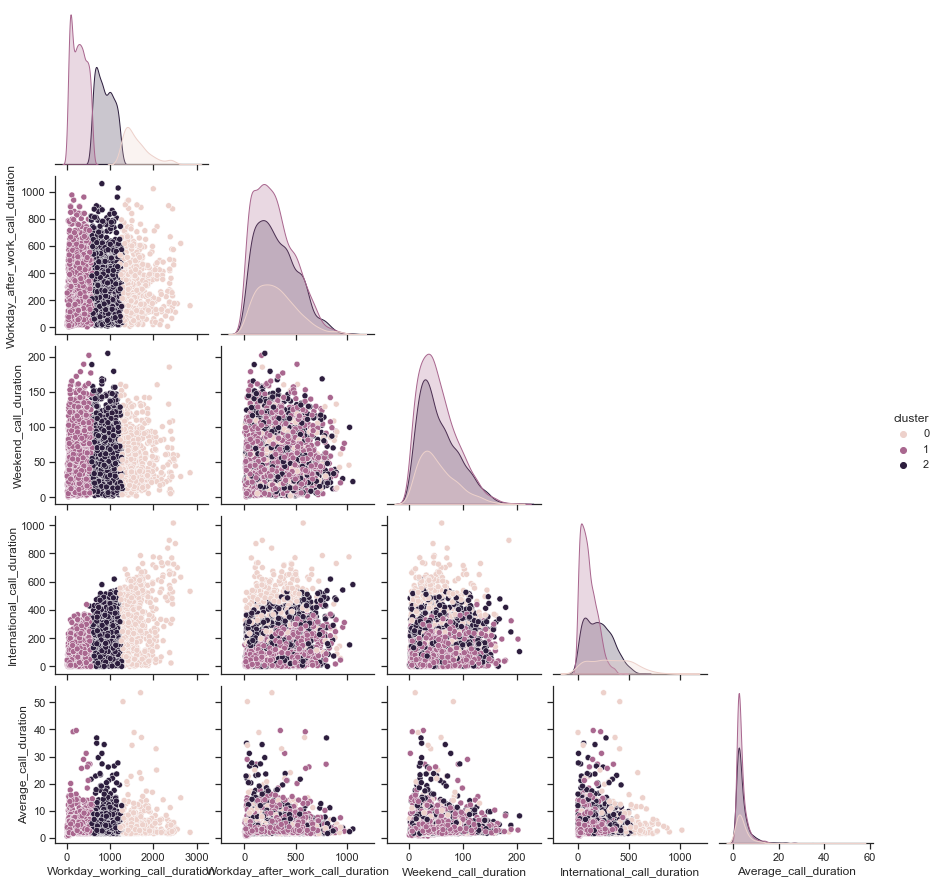

In [8]:
attributes_2 = ['Workday_working_call_duration',
                'Workday_after_work_call_duration',
                'Weekend_call_duration',
                'International_call_duration',
                'Average_call_duration',
                'cluster']

plt.figure(figsize=(32, 54), dpi=1800)
sns.pairplot(call_record[attributes_2], corner=True, hue='cluster')
plt.show()

### 3D-plot

Finally, let's conclude the model interpretation section with a **3D-plot**. We chose two attributes with high clustering effects `Workday_after_work_call_duration` and `Workday_after_work_call_duration` and one attribute with poor clustering effect `Workday_after_work_call_duration`.

The three types of customers are classified by `Workday_working_call_duration`. The thresholds are about 500 and 1250. **As` Workday_working_call_duration increases`, `International_call_duration` gradually increases** (sounds reasonable), so `International_call_duration` also has a clustering effect. On `Workday_after_work_call_duration`, the three types of customers are completely **overlapping**.

In [9]:
import plotly.express as px
fig = px.scatter_3d(call_record, x='Workday_working_call_duration',
                    y='Workday_after_work_call_duration',
                    z='International_call_duration',color=call_record['cluster'])
fig.show()

# Conclusions
The goal of this case study is to **tailor different telecom plans** for different customers. 

Based on the above analysis, we find that:

 - `Total_call_duration` has a **strong positive correlation** with `Workday_working_call_duration`.
 - `Workday_working_call_duration` and `International_call_duration` also have strong positive correlation.
 - When K-means is used for clustering, **customers can be roughly divided into three clusters** according to `Workday_working_call_duration`, and the sample numbers of the three types of customers are relatively uniform. 
 | Item | Count | Workday_working_call_duration |
|------|-------|-------------------------------|
| 0    | 1247  | <500                          |
| 1    | 1614  | [500, 1250]                   |
| 2    | 534   | >1250                         |

- In addition, `International_call_duration` also has some clustering effect.

To sum up, `three different telecom plans` can be formulated according to the duration of `Workday_working_call_duration` and `International_call_duration`.
 - The **first plan** is for customers whose `Workday_working_call_duration` and `International_call_duration` are both low, accounting for 36.7% of the total customers.
 - The **second plan** is for customers with higher `Workday_working_call_duration` and `International_call_duration`, accounting for 47.5% of the total customers.
 - The **third plan** is for clients with high `Workday_working_call_duration` and `International_call_duration`. Most of them are professionals who need to make frequent calls. Accounts for 15.7% of the total number of customers.

# Discussion: Is it important to scale data before clustering?

## Benefit of scaling:

The ‘benefit’ of scaling is measured by an increase in the metric. Let’s understand what scaling does to K-means model.

If we have two attribute, X, Y. The range of X is -30 to 30, and Y is -4 to 8. While computing the intracluster variances, **X will contribute more to the WCSS than Y**. Hence, the model tends to minimize this WCSS more by minimizing the span of the clusters in attribute X. Sometimes this property makes the classification of the K-means model counterintuitive. This won’t happen if you use standard scaling where you transform the feature as:

Let’s look at examples!

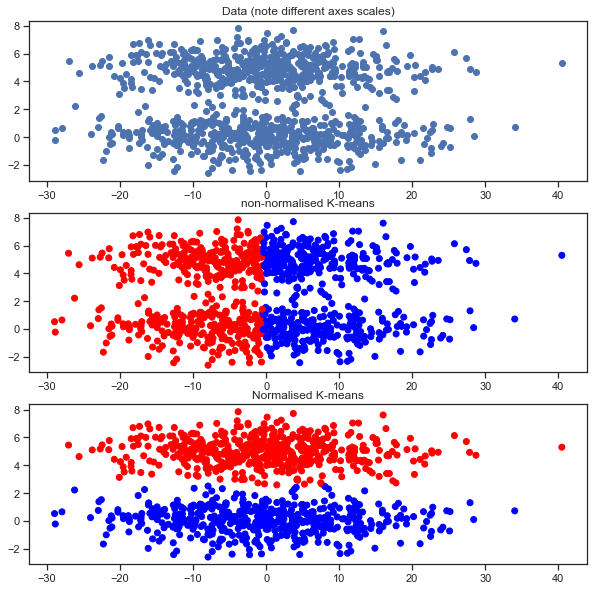

In [10]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10]

rnorm = np.random.randn

x = rnorm(1000) * 10  
y = np.concatenate([rnorm(500), rnorm(500) + 5])

fig, axes = plt.subplots(3, 1)

axes[0].scatter(x, y)
axes[0].set_title('Data (note different axes scales)')

km = KMeans(2)

clusters = km.fit_predict(np.array([x, y]).T)

axes[1].scatter(x, y, c=clusters, cmap='bwr')
axes[1].set_title('non-normalised K-means')

clusters = km.fit_predict(np.array([x / 10, y]).T)

axes[2].scatter(x, y, c=clusters, cmap='bwr')
axes[2].set_title('Normalised K-means')
plt.show()

We **randomly generated two groups of normally distributed samples** with the same variance, and their **means differed by 5 in the Y direction**. An intuitive classification would be one cluster above and below. But the **WCSS for this classification is too large** without scale (because of the **span of clusters in the X direction is too large**). So **K-means converges to the result of the left and right clusters**. If the data is normalized, then this **non-uniformity in different directions is eliminated** and K-means converges to the ideal case of one cluster above and the other.

## Cost of scaling:

Scaling will also bring many problems, for example, the **data after scale does not have clear meaning**, which will affect our interpretation of clustering results. 

In addition, there's often a **nice elbow point** when I don't scale the data, but it **disappears when it's scaled**. In fact, this is **also the case with our data set**. Suppose we **max\min scaling** the data set and then plot the elbow plot:

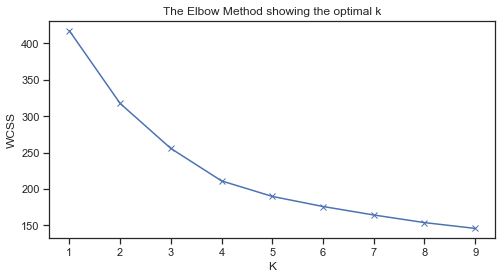

In [11]:
from sklearn import preprocessing
from sklearn.cluster import KMeans

min_max_scaler = preprocessing.MinMaxScaler()
# scale function
def scaleColumns(df, cols_to_scale):
    df2 = pd.DataFrame()
    for col in cols_to_scale:
        df2[col] = pd.DataFrame(min_max_scaler.fit_transform(pd.DataFrame(df[col])),columns=[col])
    return df2
# scale the original dataset
scaled_call_record = scaleColumns(call_record, attributes)

# plot the elbow plot
scale_distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(scaled_call_record[attributes])
    scale_distortions.append(kmeanModel.inertia_)
    
plt.figure(figsize=(8,4))
plt.plot(K, scale_distortions, 'bx-')
plt.xlabel('K')
plt.ylabel('WCSS')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In short, whether you need scaling depends on the data.

 - If **all the attributes have the same meaning** (call duration in minutes, in our case), you should not scale the data, as this causes distortion.

 - If **each attribute is something completely different** (like shoe size and weight), there are different units (centimeters, kilometers, minutes, kilograms...) , then the **values are not really comparable**。 **Scaling** them is the best practice for **giving them equal weight**.

In our example, **all attributes are measured in minutes**. We don't think any attribute is more valuable than any other. Also, scaling the data results in an **elbow chart with no clear elbow points**. Therefore, we decided not to scale the data set.